In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


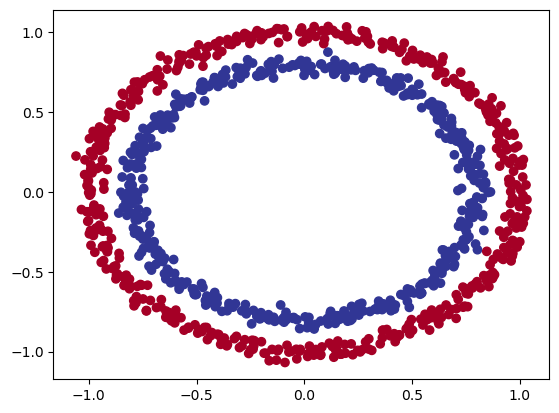

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(800, 800)

In [8]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_1.fit(X_train, y_train, epochs=5, verbose=1)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/5


2023-05-05 11:52:15.414927: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 1s 7ms/step - loss: 5.7007 - accuracy: 0.4737
Epoch 2/5
25/25 [==============================] - 0s 4ms/step - loss: 4.7790 - accuracy: 0.4562
Epoch 3/5
25/25 [==============================] - 0s 6ms/step - loss: 4.1074 - accuracy: 0.4587
Epoch 4/5
25/25 [==============================] - 0s 5ms/step - loss: 4.6686 - accuracy: 0.5575
Epoch 5/5
25/25 [==============================] - 0s 7ms/step - loss: 4.3366 - accuracy: 0.5387


In [9]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 3.4422 - accuracy: 0.5050


[3.4422383308410645, 0.5049999952316284]

In [10]:
# training for longer
model_1.fit(X_train, y_train, epochs=200, verbose=0)
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.4550


[0.6945397853851318, 0.45499998331069946]

In [11]:
# adding more layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [12]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.5000


[0.693254292011261, 0.5]

In [13]:
# increase hidden units
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [14]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 30ms/step - loss: 0.6936 - accuracy: 0.4750


[0.6936392784118652, 0.4749999940395355]

In [15]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


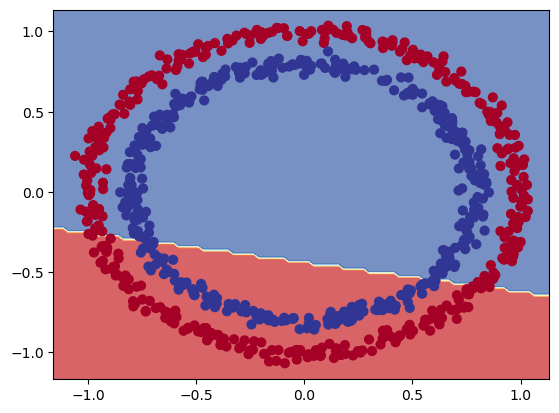

In [16]:
plot_decision_boundary(model_3, X_train, y_train)

In [17]:
# linear activation
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_4.fit(X_train, y_train, epochs=100, verbose=0)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


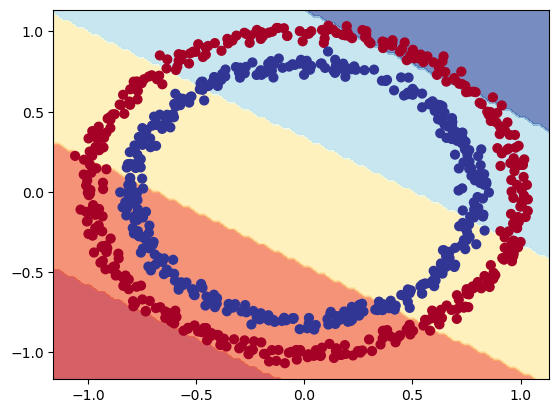

In [18]:
plot_decision_boundary(model_4, X_train, y_train)

In [19]:
# relu activation
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history = model_5.fit(X_train, y_train, epochs=250, verbose=0)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


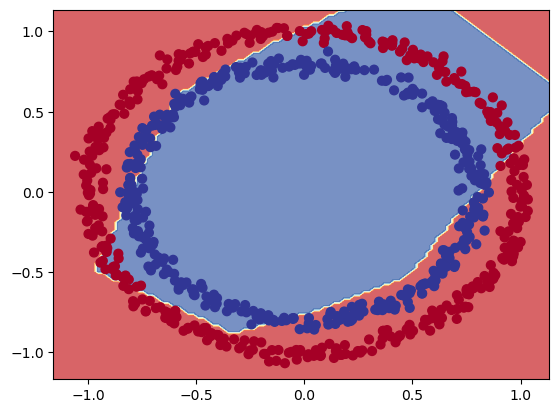

In [20]:
plot_decision_boundary(model_5, X_train, y_train)

In [21]:
# sigmoid activation on last layer
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

history = model_6.fit(X_train, y_train, epochs=250, verbose=0)
# increased to 250 epochs because it was fitting well

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


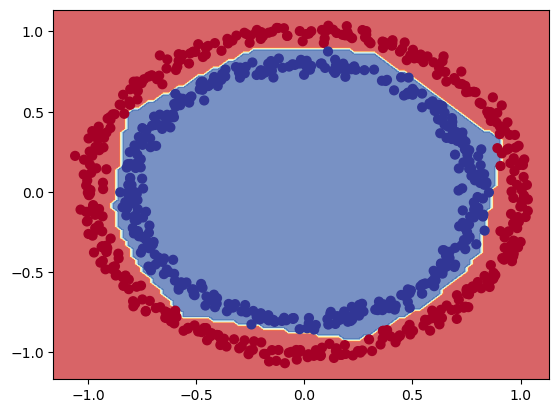

In [22]:
plot_decision_boundary(model_6, X_train, y_train)

In [23]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.1370 - accuracy: 0.9900


[0.13704605400562286, 0.9899999499320984]

In [24]:
# replicating non linear functions from scratch

A = tf.cast(range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

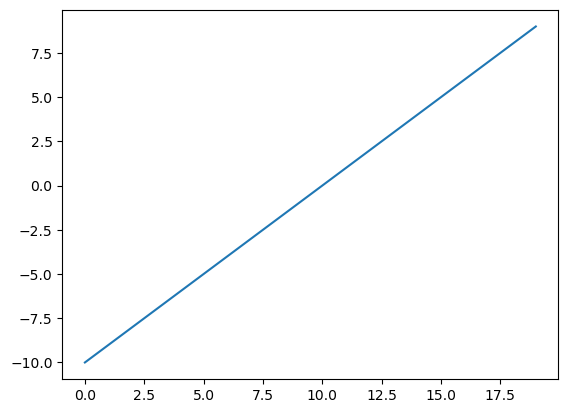

In [25]:
plt.plot(A)

In [26]:
# replicating sigmoid = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

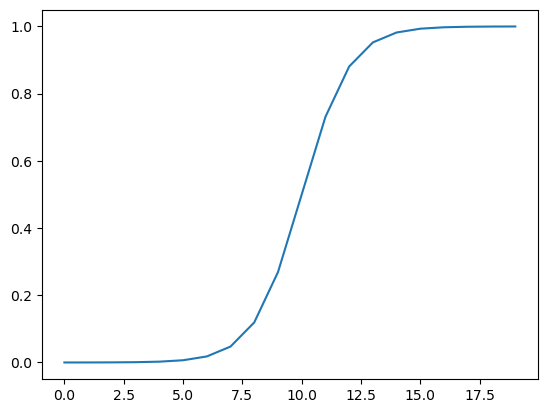

In [27]:
plt.plot(sigmoid(A))

In [28]:
# replicating relu = max(x, 0)
def relu(x):
  return tf.maximum(x, 0)

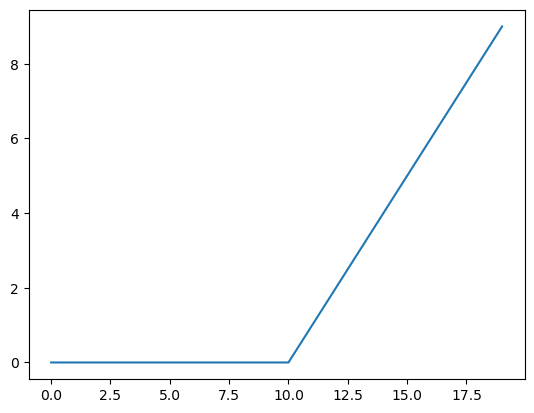

In [29]:
plt.plot(relu(A))

<Axes: >

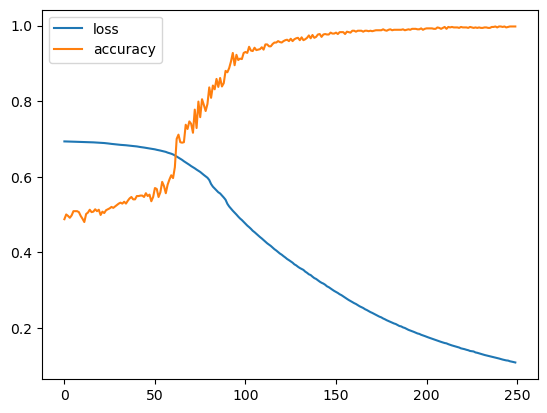

In [30]:
pd.DataFrame(history.history).plot()

In [31]:
# finding the best learning rate
tf.random.set_seed(42)

#same as old model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# creating callback to change learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

history = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.6996 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6994 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6992 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6990 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6988 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6986 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6983 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6981 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss:

Text(0.5, 1.0, 'Learning Rate vs Loss')

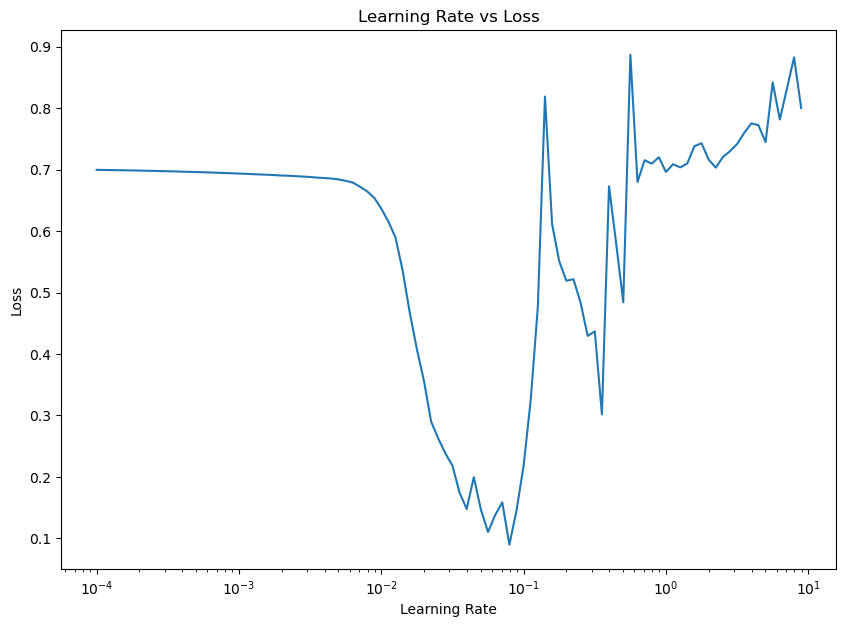

In [32]:
# plotting learning rate vs loss
lrs = 1e-4 * 10 ** (tf.range(100) / 20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

Ideal learning rate approximately 0.01 - 0.1

In [33]:
# creating model with better learning rate
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_9.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history = model_9.fit(X_train, y_train, epochs=25, verbose=0)

In [34]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 15ms/step - loss: 0.0968 - accuracy: 0.9700


[0.09683217108249664, 0.9699999690055847]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


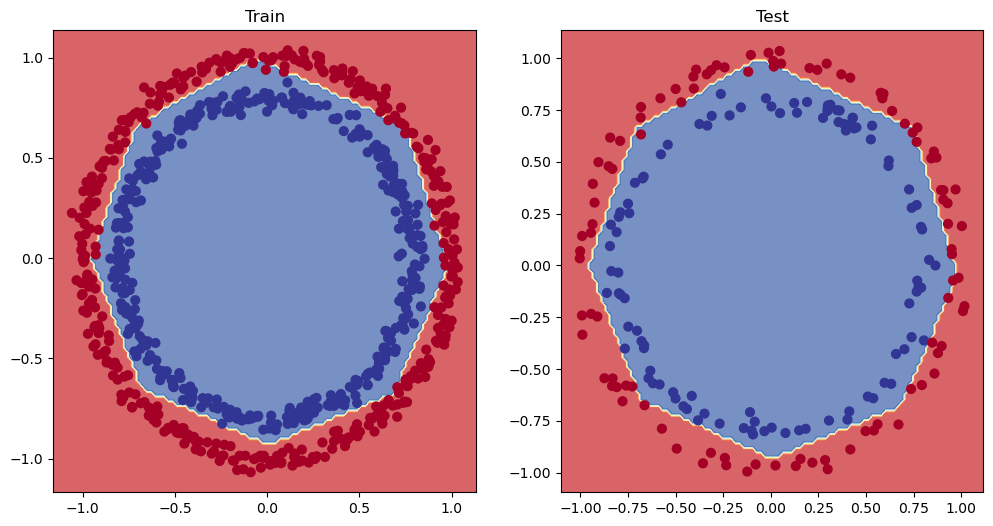

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()

<Axes: >

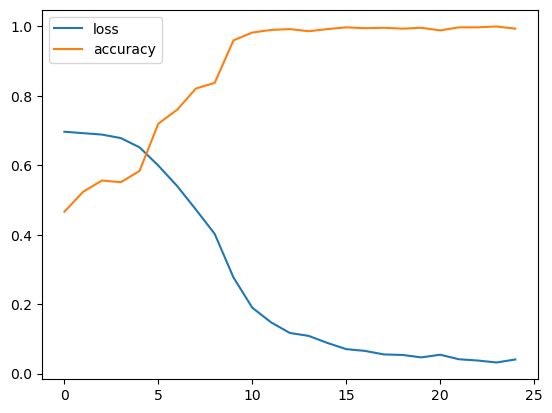

In [36]:
pd.DataFrame(history.history).plot()

In [37]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_9.predict(X_test)
# need to convert y_pred to 0 and 1's
y_pred_rounded = tf.round(y_pred)

confusion_matrix(y_test, y_pred_rounded)

7/7 [==============================] - 0s 5ms/step


array([[ 94,   6],
       [  0, 100]])

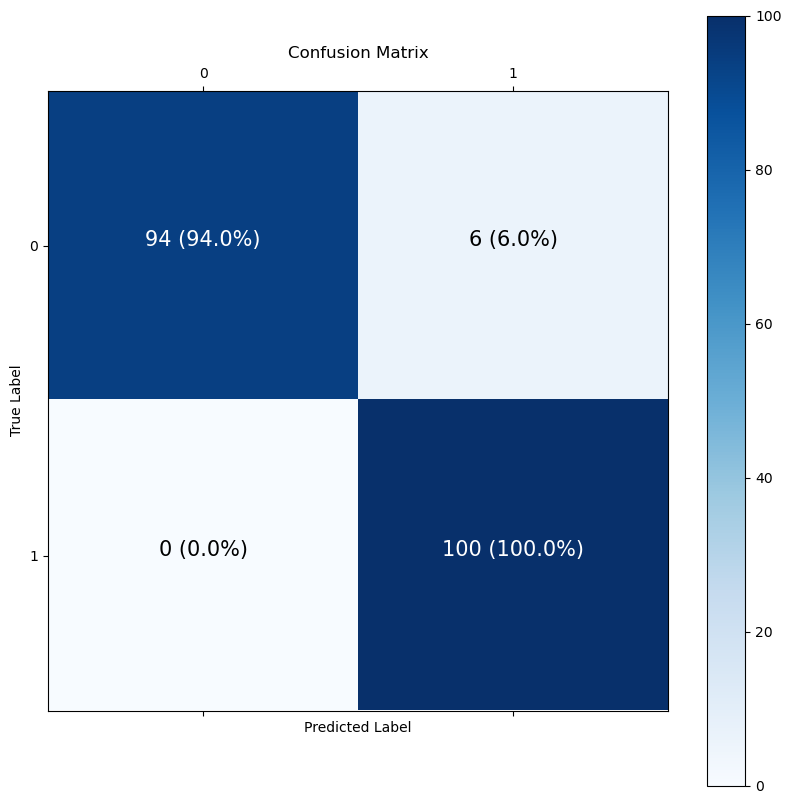

In [38]:
# prettying confusion matrix
import itertools

figsize = (10, 10)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# prettify
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# theshold for colors
threshold = (cm.max() + cm.min()) / 2.

# plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100 :.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### A Larger Example

In [39]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 6s 1us/step


In [40]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

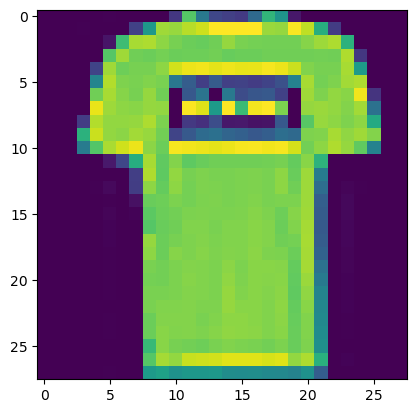

In [41]:
# plotting a sample
import matplotlib.pyplot as plt

plt.imshow(train_data[1])

In [42]:
# list of output categories
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

Text(0.5, 1.0, 'T-shirt/top')

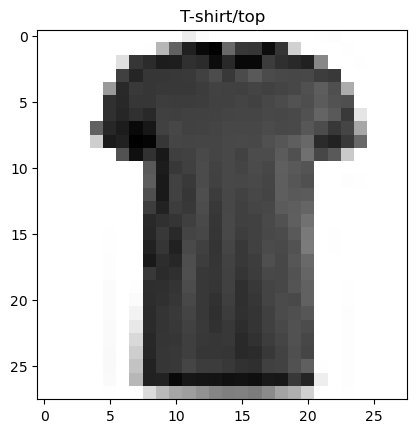

In [43]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

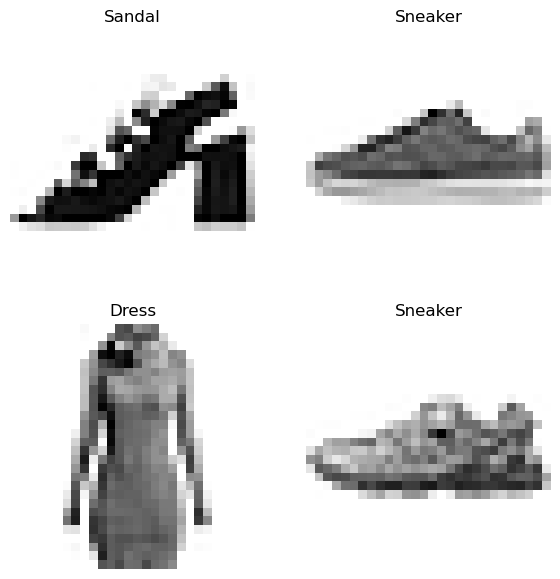

In [44]:
# plotting multiple random images to visualise
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [45]:
# building the model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

history_1 = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.4105 - accuracy: 0.1462 - val_loss: 1.9137 - val_accuracy: 0.2153
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7820 - accuracy: 0.2445 - val_loss: 1.6959 - val_accuracy: 0.2616
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6018 - accuracy: 0.3174 - val_loss: 1.5428 - val_accuracy: 0.3236
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4981 - accuracy: 0.3442 - val_loss: 1.4936 - val_accuracy: 0.3516
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4591 - accuracy: 0.3543 - val_loss: 1.4461 - val_accuracy: 0.3509
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4327 - accuracy: 0.3576 - val_loss: 1.4340 - val_accuracy: 0.3544
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4194 - accuracy: 0.3594 - val_loss: 1.4217 - val_ac

In [46]:
# normalising data
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [47]:
# modelling with normalised data
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

history_2 = model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0086 - accuracy: 0.6303 - val_loss: 0.7219 - val_accuracy: 0.7474
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6558 - accuracy: 0.7721 - val_loss: 0.6601 - val_accuracy: 0.7809
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5952 - accuracy: 0.7963 - val_loss: 0.6079 - val_accuracy: 0.7917
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5669 - accuracy: 0.8046 - val_loss: 0.5811 - val_accuracy: 0.8027
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5501 - accuracy: 0.8101 - val_loss: 0.6005 - val_accuracy: 0.7917
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5375 - accuracy: 0.8140 - val_loss: 0.5737 - val_accuracy: 0.8023
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5297 - accuracy: 0.8159 - val_loss: 0.5754 - val_ac

<Axes: title={'center': 'Normalised'}>

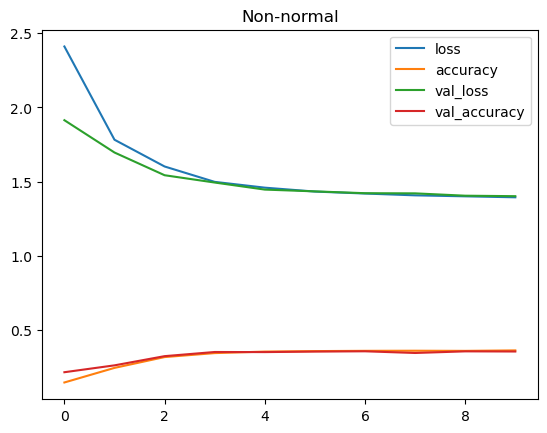

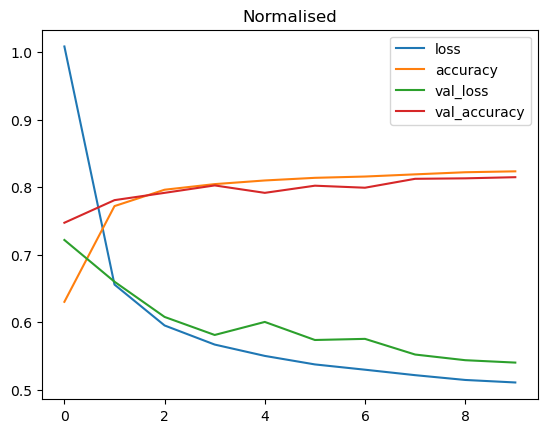

In [48]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Non-normal")
pd.DataFrame(history_2.history).plot(title="Normalised")

In [49]:
# finding ideal learning rate
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

history_3 = model_3.fit(train_data_norm, train_labels, epochs=40, 
                        validation_data=(test_data_norm, test_labels),
                        callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2538 - accuracy: 0.5909 - val_loss: 0.9342 - val_accuracy: 0.7199 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7862 - accuracy: 0.7450 - val_loss: 0.7498 - val_accuracy: 0.7468 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6859 - accuracy: 0.7599 - val_loss: 0.7028 - val_accuracy: 0.7513 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6464 - accuracy: 0.7691 - val_loss: 0.6699 - val_accuracy: 0.7630 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6257 - accuracy: 0.7736 - val_loss: 0.6701 - val_accuracy: 0.7670 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6120 - accuracy: 0.7783 - val_loss: 0.6487 - val_accuracy: 0.7679 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

Text(0, 0.5, 'Loss')

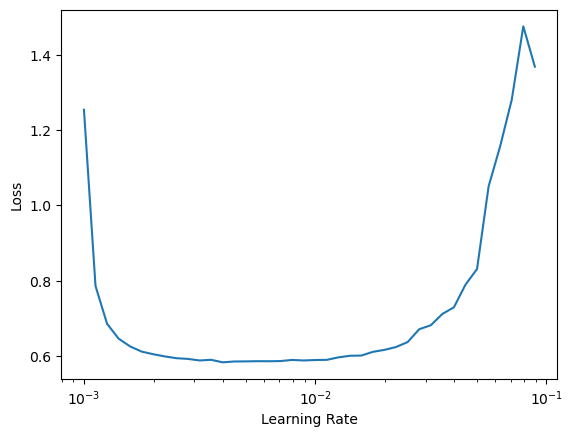

In [50]:
lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

Ideal learning rate is 0.001, Adam's default

In [51]:
# repeating model_2 with increased epochs
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_4.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

history_4 = model_4.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3531 - accuracy: 0.4708 - val_loss: 0.9236 - val_accuracy: 0.6526
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7594 - accuracy: 0.7129 - val_loss: 0.6886 - val_accuracy: 0.7569
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6314 - accuracy: 0.7718 - val_loss: 0.6424 - val_accuracy: 0.7639
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5927 - accuracy: 0.7830 - val_loss: 0.6039 - val_accuracy: 0.7778
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5713 - accuracy: 0.7896 - val_loss: 0.5898 - val_accuracy: 0.7844
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5559 - accuracy: 0.7951 - val_loss: 0.5886 - val_accuracy: 0.7789
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5447 - accuracy: 0.8003 - val_loss: 0.5651 - val_ac

In [52]:
# confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # creating confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # prettify
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # theshold for colors
  threshold = (cm.max() + cm.min()) / 2.

  # plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100 :.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

313/313 [==============================] - 1s 2ms/step


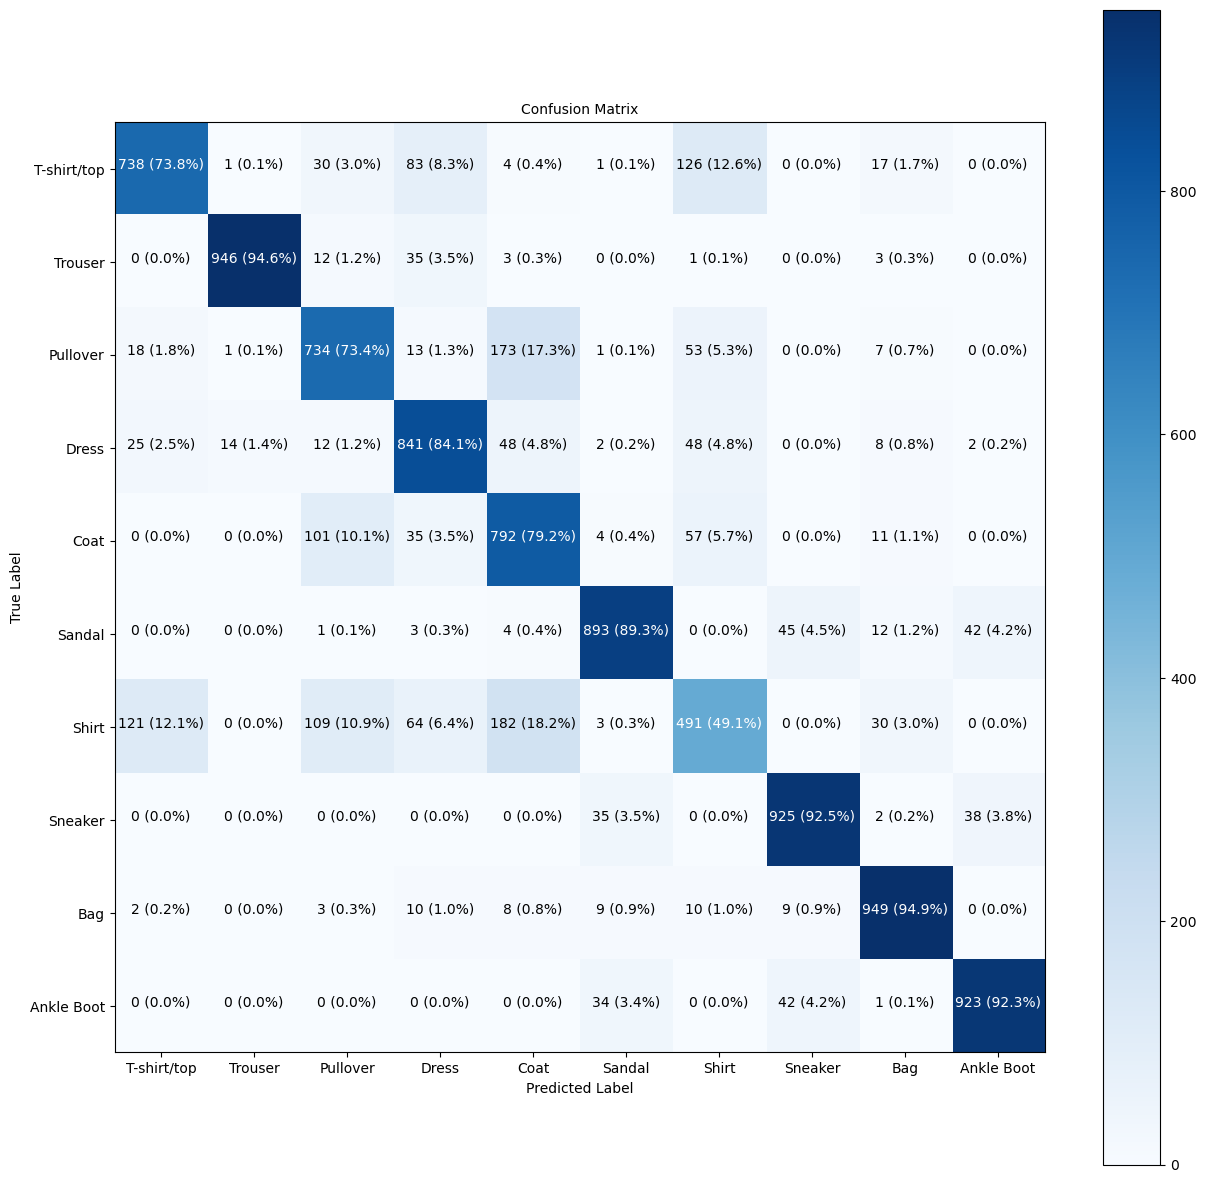

In [53]:
y_prob = model_4.predict(test_data_norm)
y_pred = y_prob.argmax(axis=1)
make_confusion_matrix(test_labels, y_pred, class_names, figsize=(15, 15), text_size=10)

In [54]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks and plots a random image to labels the truth and predicted label
  """

  # random integer
  i = random.randint(0, len(images))

  # create predictions
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                  100 * tf.reduce_max(pred_probs), 
                                                  true_label),
             color=color)

1/1 [==============================] - 0s 256ms/step


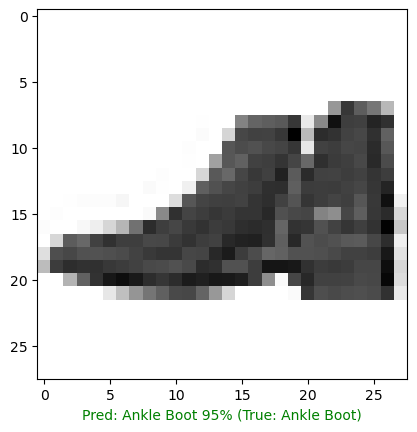

In [55]:
# checking random image prediction
plot_random_image(model_4, test_data_norm, test_labels, class_names)

In [56]:
# making a model with more neurons in the hidden layers
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_5.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

history_5 = model_5.fit(train_data_norm, train_labels, epochs=25, validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5869 - accuracy: 0.7996 - val_loss: 0.4852 - val_accuracy: 0.8222
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4240 - accuracy: 0.8492 - val_loss: 0.4870 - val_accuracy: 0.8352
Epoch 3/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3936 - accuracy: 0.8594 - val_loss: 0.4295 - val_accuracy: 0.8417
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3730 - accuracy: 0.8670 - val_loss: 0.4159 - val_accuracy: 0.8516
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3604 - accuracy: 0.8701 - val_loss: 0.4208 - val_accuracy: 0.8479
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3481 - accuracy: 0.8746 - val_loss: 0.4116 - val_accuracy: 0.8491
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3396 - accuracy: 0.8771 - val_loss: 0.4101 - val_ac

313/313 [==============================] - 1s 2ms/step


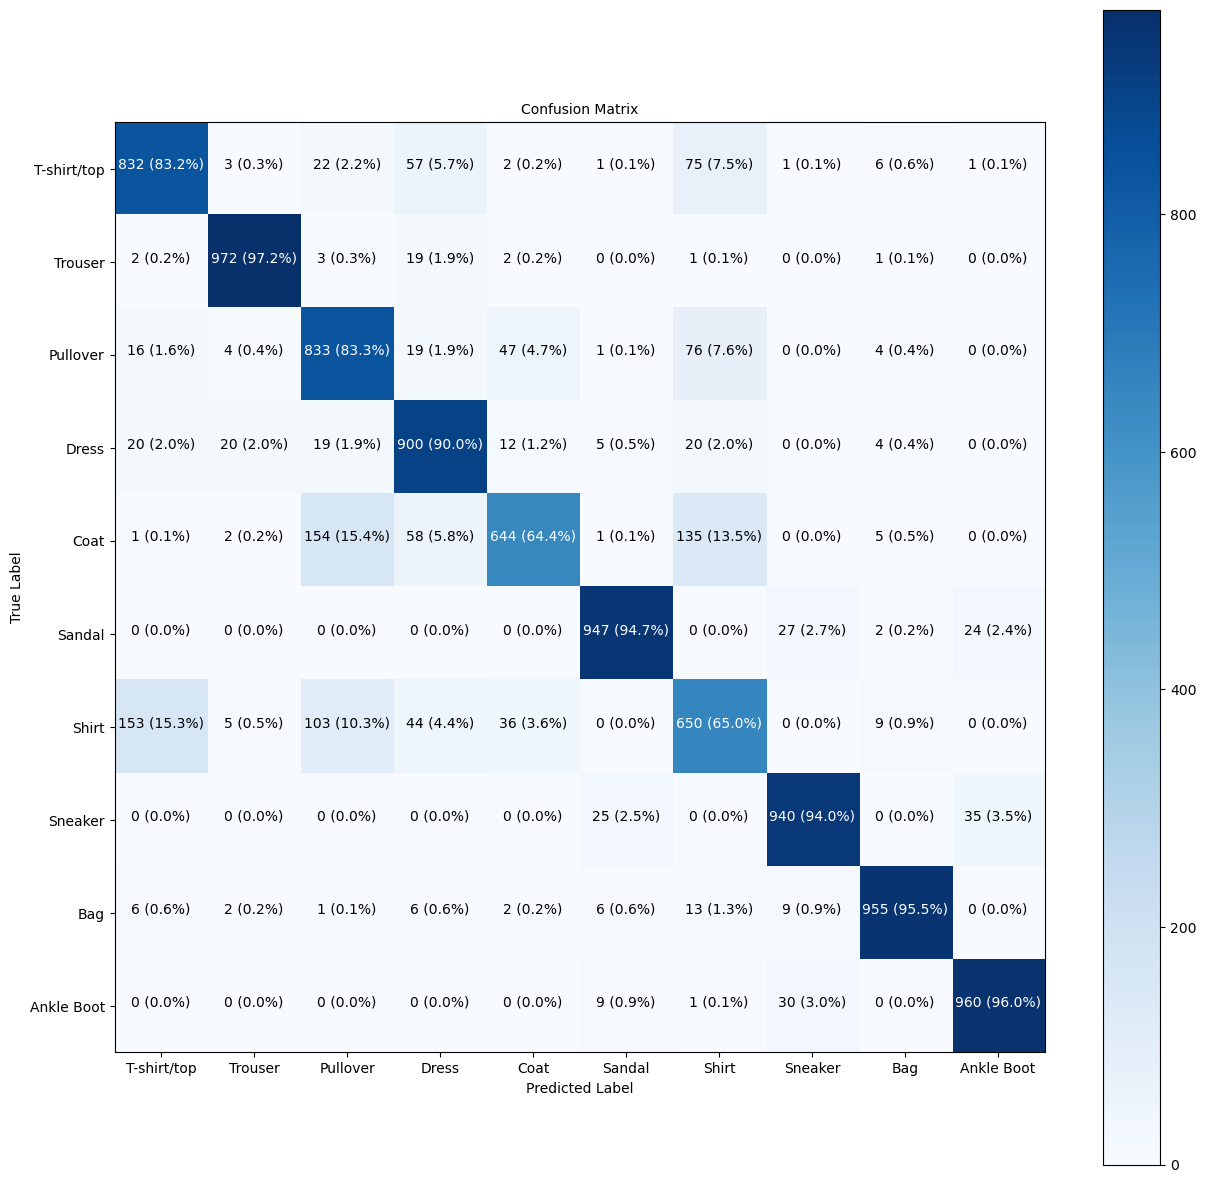

In [57]:
y_prob = model_5.predict(test_data_norm)
y_pred = y_prob.argmax(axis=1)
make_confusion_matrix(test_labels, y_pred, class_names, figsize=(15, 15), text_size=10)

### Make Moons Exercise

In [58]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [59]:
X, y = make_moons(1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

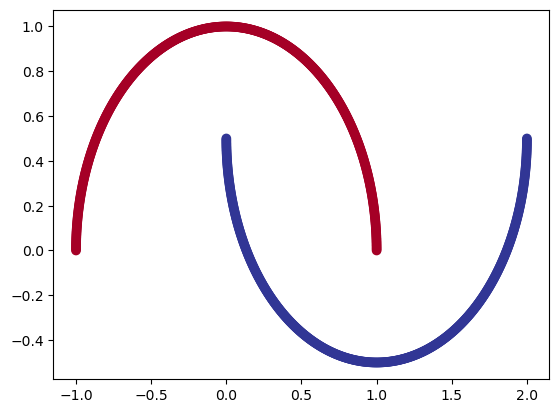

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [61]:
# creating model
moon_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

moon_model.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

moon_model.fit(X_train, y_train, epochs=100, verbose=0)

In [62]:
moon_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014771592104807496, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


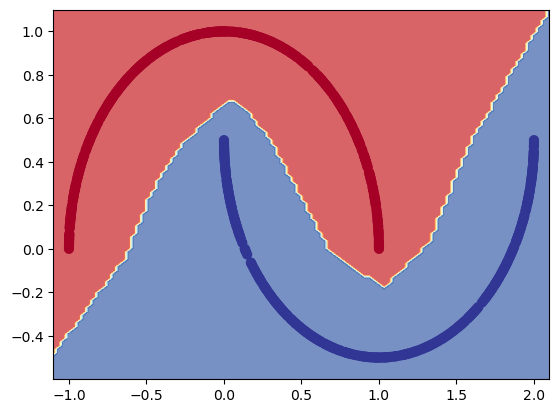

In [63]:
plot_decision_boundary(moon_model, X_train, y_train)